# MSc Project : analysis 025 scaling method-2 and contribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
# import pandas as pd
import dask
# from mpl_toolkits.basemap import Basemap
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp 
%matplotlib inline

In [2]:
from functions import ccplot

In [3]:
# import seaborn as sns
# Use seaborn style defaults and set default figure size
# plt.style.use('seaborn-pastel')
# sns.set_theme(style="ticks")
# plt.style.use(['science', 'notebook'])
plt.style.use('tableau-colorblind10')

In [4]:
# Colormap selection
xr.set_options(cmap_divergent='BrBG', cmap_sequential='YlGnBu')

In [5]:
fsize = 15
tsize = 18

tdir = 'in'

major = 5.0
minor = 3.0

# plt.style.use(style)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = 1.4
plt.rcParams['legend.handlelength'] = 0.5

In [6]:
# making a new colomap -> tmap

n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu_r
lower = cmap(np.linspace(0, diff, n))
lower2 = cmap2(np.linspace(0, diff, n))
white = np.ones((1, 4))
white2 = np.ones((1, 4))
upper = cmap(np.linspace(1-diff, 1, n))
upper2 = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, upper))
colors2 = np.vstack((lower2, white2, upper2))
tmap = m.colors.LinearSegmentedColormap.from_list('map_white', colors)
tmap2 = m.colors.LinearSegmentedColormap.from_list('map_white', colors2)

In [7]:
mfdata_DIR = './data/GPM_lowres_data/*.nc'

# gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=1000, lat=-1, lon=-1), engine='netcdf4', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_dataset('./data/GPM_lowres_data/gpm_2000.nc', chunks={"time":2000})
gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=-1, lat=-1, lon=-1))

In [8]:
gpm

<xarray.Dataset>
Dimensions:    (time: 369600, lon: 161, lat: 161)
Coordinates:
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:30:00
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(10272, 161, 161), meta=np.ndarray>

In [10]:
precip = gpm.precipCal.resample(time = '1H').sum() / 2

KeyboardInterrupt: 

In [ ]:
precip  = precip.chunk(dict(time=-1, lat=-1, lon=-1))
precip

In [ ]:
mfdata_DIR2 = './data/era_data/*.nc'

# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=-1, lat=40, lon=40))

In [ ]:
era = era.sel(expver=1, drop=True)
era = era.transpose('time', 'latitude', 'longitude')
era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})
era = era.rename({'longitude':'lon', 'latitude':'lat'})
era = era.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era

In [ ]:
mfdata_DIR3 = './data/era_pres_data/*.nc'

era_pres = xr.open_mfdataset(mfdata_DIR3, chunks=dict(time=-1, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era_pres = xr.open_mfdataset(mfdata_DIR3, chunks=dict(time=1000, lat=40, lon=40))

In [ ]:
# era = era.sel(expver=1, drop=True)
era_pres = era_pres.transpose('time', 'level', 'latitude', 'longitude')
era_pres = era_pres.rename_dims({'longitude':'lon', 'latitude':'lat'})
era_pres = era_pres.rename({'longitude':'lon', 'latitude':'lat'})
era_pres = era_pres.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era_pres

In [ ]:
mfdata_DIR4 = './data/era_data2/*.nc'

# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
era2 = xr.open_mfdataset(mfdata_DIR4, chunks=dict(time=-1, lat=40, lon=40))

In [ ]:
# era2 = era2.sel(expver=1, drop=True)
era2 = era2.transpose('time', 'latitude', 'longitude')
era2 = era2.rename_dims({'longitude':'lon', 'latitude':'lat'})
era2 = era2.rename({'longitude':'lon', 'latitude':'lat'})
era2 = era2.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))
era2

In [ ]:
t2m = era.t2m.resample(time = '1H').mean()
d2m = era.d2m.resample(time = '1H').mean()
# vimd = (era2.vimd).resample(time = '1H').mean()
# evap = (era2.e).resample(time = '1H').mean()
# u = (era.u10).resample(time = '1H').mean()
# v = (era.v10).resample(time = '1H').mean()
# pres = era_pres.coords['level'],
# temp = era_pres.t.resample(time = '1H').mean()
# omega = era_pres.w.resample(time = '1H').mean()
# q = era_pres.q.resample(time = '1H').mean()

In [ ]:
precip

In [ ]:
# era2.vimd.isel(lat = 0, lon = 0, time = 0).values

In [ ]:
# ds_comb = xr.merge([precip, t2m, d2m, vimd, evap, u, v])
# ds_comb2 = xr.merge([temp, q, omega])

ds_comb = xr.merge([precip, t2m, d2m])

In [ ]:
ds_comb

In [ ]:
mon = [6,7,8,9]
premon = [3,4,5]
postmon = [10,11,12]
wint = [1,2]

In [ ]:
ds_comb_mon = xr.concat([list(ds_comb.groupby('time.month'))[i-1][1] for i in mon], dim='time')
ds_comb_mon2 = xr.concat([list(ds_comb2.groupby('time.month'))[i-1][1] for i in mon], dim='time')

In [25]:
ds_comb_mon = ds_comb_mon.sortby('time.year')
ds_comb_mon2 = ds_comb_mon2.sortby('time.year')

C:\Users\Dr.NKV\miniconda3\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing with an out-of-order index is generating 22 times more chunks
  return self.array[key]


In [36]:
ds_comb_mon

,Array,Chunk
Bytes,7.26 GiB,2.87 MiB
Shape,"(2592, 29, 161, 161)","(1, 29, 161, 161)"
Count,40209 Tasks,2592 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,7.26 GiB,2.87 MiB
Shape,"(2592, 29, 161, 161)","(1, 29, 161, 161)"
Count,40209 Tasks,2592 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [37]:
precip = ds_comb_mon.precipCal
t2m = ds_comb_mon.t2m
d2m = ds_comb_mon.d2m
vimd = ds_comb_mon.vimd
evap = ds_comb_mon.e
u = ds_comb_mon.u10
v = ds_comb_mon.v10

temp = ds_comb_mon2.t
q = ds_comb_mon2.q
omega = ds_comb_mon2.w

In [33]:
# precip_daily_rate = precip[::-1].rolling(time=24).sum()[::-1]
precip_daily_rate = precip

In [38]:
precip = xr.where(precip_daily_rate > 1, precip, np.nan)
# precip = precip.where(precip > 0)
t2m = t2m.where(precip != np.nan)
d2m = d2m.where(precip != np.nan)
vimd = vimd.where(precip != np.nan)
evap = evap.where(precip != np.nan)
u = u.where(precip != np.nan)
v = v.where(precip != np.nan)
temp = temp.where(precip != np.nan)
q = q.where(precip != np.nan)
omega = omega.where(precip != np.nan)

In [39]:
ind_precip = precip.chunk(dict(time=-1, lat=-1, lon=-1))
ind_t2m = t2m.chunk(dict(time=-1, lat=-1, lon=-1))
ind_d2m = d2m.chunk(dict(time=-1, lat=-1, lon=-1))
ind_vimd = vimd.chunk(dict(time=-1, lat=-1, lon=-1))
ind_evap = evap.chunk(dict(time=-1, lat=-1, lon=-1))
ind_u = u.chunk(dict(time=-1, lat=-1, lon=-1))
ind_v = v.chunk(dict(time=-1, lat=-1, lon=-1))
ind_temp = temp.chunk(dict(time=-1, lat=-1, lon=-1))
ind_q = q.chunk(dict(time=-1, lat=-1, lon=-1))
ind_omega = omega.chunk(dict(time=-1, lat=-1, lon=-1))

In [40]:
ind_precip_loaded = ind_precip.load()
ind_t2m_loaded = ind_t2m.load()
ind_d2m_loaded = ind_d2m.load()
ind_vimd_loaded = ind_vimd.load()
ind_evap_loaded = ind_evap.load()
ind_u_loaded = ind_u.load()
ind_v_loaded = ind_v.load()
ind_q_loaded = ind_q.load()
ind_temp_loaded = ind_temp.load()
ind_omega_loaded = ind_omega.load()

In [342]:
p95_kol = ind_precip_loaded.sel(lat = 32, lon = 76).quantile(0.95, interpolation='higher')
pe_kol = get_events_precip(p95_kol, ind_precip_loaded.sel(lat = 32, lon = 76))
p95_kol

<xarray.DataArray 'precipCal' ()>
array(59.55369, dtype=float32)
Coordinates:
    quantile  float64 0.95

In [130]:
# bunch of utility functions
import numpy as np
from scipy import stats
from scipy import integrate
from sklearn.metrics import mean_squared_error as mse

# util function to determine the number of bins
def equal_obs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x, axis= None))

# util function to get the slope value
def get_res(x, y):
    if np.size(y) == 0:
        slope, p = np.nan, np.nan
    else:
        slope, _, _, p, _ = stats.linregress(x, np.log(y))

    return slope, p

# util function to find the values greater than or equal to p95 in precipitation array
# and use the indices of the events to get the meteorological values in the main function
def get_events_precip(p95, preciparr):
    idxs = np.where(preciparr >= p95)
    events = preciparr[idxs]
    return events, idxs

# util function to calculate value of qs
def get_qs(temp, pres):
    a1 = 6.1114
    temp0 = 273.16
    a3w = 17.269
    a4w = 35.86
    a3i = 21.875
    a4i = 7.66

    # calculating saturation vapor pressure using temperature values
    if temp > temp0:
        a3 = a3w
        a4 = a4w
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    elif temp < temp0 - 23:
        a3 = a3i
        a4 = a4i
        es = a1 * np.exp(a3 * ((temp - temp0)/(temp - a4)))
    else:
        esw = a1 * np.exp(a3w * ((temp - temp0)/(temp - a4w)))
        esi = a1 * np.exp(a3i * ((temp - temp0)/(temp - a4i)))
        es = esi + ((esw - esi)*(((temp - (temp0 - 23))/23)**2))

    # get saturation specific humidity value
    epsilon = 0.622
    qs = (epsilon * es) / (pres - ((1 - epsilon)*es))
    return qs

def calc_qs(temp, pres):
    pres_range = len(pres)
    time_range = len(temp)
    qs = np.empty((time_range, pres_range))
    for i in range(time_range):
        for j in range(pres_range):
            qs[i, j] = get_qs(temp[i, j], pres[j])
    return qs

# vert integral function (Simpson's method)
def vert_integ(x, y):
    int = integrate.simpson(y, x, even='avg')

    return int

# finite differnce methods to find derivative
def centered_diff(arr):
    arr_diff = np.empty(len(arr) - 2)
    for i in range((len(arr) - 2)):
        arr_diff[i] = arr[i+2] - arr[i]
    return arr_diff

def forward_diff(arr):
    arr_diff = np.diff(arr)
    return arr_diff

def backward_diff(arr):
    arr_diff = -(np.diff(arr[::-1])[::-1])
    return arr_diff

def get_pe1(omega, pres, qs):
    p_cdiff = centered_diff(pres)
    p_fdiff = forward_diff(pres)
    p_bdiff = backward_diff(pres)

    time_range = len(omega)
    pe = np.empty(time_range)
    thermo = np.empty(time_range)

    # taking mean omega of all extremes to get the thermodynamic contribution
    omega_mean = np.nanmean(omega)

    for i in range(time_range):
        qs_cdiff = centered_diff(qs[i])/(p_cdiff)
        qs_fdiff = forward_diff(qs[i])/(p_fdiff)
        qs_bdiff = backward_diff(qs[i])/(p_bdiff)

        qs_diff = np.insert(qs_cdiff, 0, qs_fdiff[0])
        qs_diff = np.append(qs_diff, qs_bdiff[-1])

        # TODO VARY: the value of 3600 will change for different time calculations
        # 1 hour -> 3600s
        # 3 hour -> 3600*3 and so on
        # '+' sign as pressure is from surface-to-top and not top-to-surface
        pe[i] = (+1/(9.806)) * vert_integ(pres, omega[i]*qs_diff) * 3600
        thermo[i] = (+1/(9.806)) * vert_integ(pres, omega_mean*qs_diff) * 3600

    dyn = pe - thermo
    return pe, dyn, thermo

def get_pe2(evap, u, v, omega, pres, q):
    p_cdiff = centered_diff(pres)
    p_fdiff = forward_diff(pres)
    p_bdiff = backward_diff(pres)

    time_range = len(omega)
    pe = np.empty(time_range)
    thermo = np.empty(time_range)
    v_adv = np.empty(time_range)
    h_adv = np.empty(time_range)

    # taking mean of all extremes to get the thermodynamic contribution
    omega_mean = np.nanmean(omega)

    for i in range(time_range):
        q_cdiff = centered_diff(q[i])/(p_cdiff)
        q_fdiff = forward_diff(q[i])/(p_fdiff)
        q_bdiff = backward_diff(q[i])/(p_bdiff)

        q_diff = np.insert(q_cdiff, 0, q_fdiff[0])
        q_diff = np.append(q_diff, q_bdiff[-1])

        # TODO VARY: the value of 3600 will change for different time calculations
        # 1 hour -> 3600s
        # 3 hour -> 3600*3 and so on
        v_adv[i] = (+1/(9.806)) * vert_integ(pres, omega[i]*q_diff) * 3600
        thermo[i] = (+1/(9.806)) * vert_integ(pres, omega_mean*q_diff) * 3600

        # calculating the gradient of q (TODO CHECK: check the dimensions order, should be [lat, lon, pres])
        gradq = np.gradient(q[i], pres)
        h_adv[i] = (+1/(9.806)) * vert_integ(pres, (gradq*((u[i] + v[i]).to_numpy()*np.ones(29)))) *3600

    pe = evap - v_adv - h_adv

    dyn = v_adv - thermo
    # calculate recharge/discharge from the main program
    return pe, v_adv, h_adv, dyn, thermo

# get statistical measures
# NOTE : percentage bias will be calculated in the main loop
def get_stats(p, pe):
    mb = np.mean(pe - p)
    fb = np.sum(pe - p) / np.sum(pe + p)
    if p != np.nan:
        rmse = np.sqrt(mse(p, pe))
    else:
        rmse = np.nan
    return mb, fb, rmse


In [343]:
pe_kol[0]

<xarray.DataArray 'precipCal' (time: 65)>
array([ 81.434616,  60.729725,  68.00028 ,  86.98654 , 131.20192 ,
        75.348595, 119.39499 ,  83.5866  ,  68.76256 ,  77.90125 ,
        63.537518,  87.9406  ,  93.70247 ,  89.36991 , 207.61017 ,
        59.55369 ,  76.21261 ,  66.397995, 108.289345,  63.672176,
       151.22983 ,  65.67391 , 116.80422 ,  72.984566,  79.845375,
        66.60245 ,  77.01565 , 124.332115,  70.410934,  86.92122 ,
        97.92074 ,  85.900604,  63.19829 ,  66.22526 ,  77.35002 ,
        66.20441 ,  63.077774,  75.13953 ,  69.63154 , 148.87997 ,
       136.03754 ,  91.07073 ,  89.858444,  69.930534,  71.53692 ,
        79.40052 ,  67.111626,  81.42844 , 121.81908 ,  60.267853,
        60.65929 ,  66.156494,  63.415348,  65.22984 ,  87.06623 ,
        71.93534 ,  74.932304, 137.62025 , 137.24791 ,  72.6973  ,
        77.81445 , 101.619804, 158.34293 , 106.408646, 117.12443 ],
      dtype=float32)
Coordinates:
    lat      float64 32.0
  * time     (time) datetime64[ns] 2000-06-28 2000-07-09 ... 2019-08-17
    lon      float64 76.0

In [324]:
# The new technique to determine the precipitation extremes but not scaling
import numpy as np
import util

# 3d function
def get_scaling_3d(precip, t2m, d2m, pres, temp_levels, q, vimd, evap, omega, u, v):
    print("Starting the scaling process ...")

    print("Initializing zero arrays ...")

    xrange = len(t2m[0])
    yrange = len(t2m[0][0])

    # initialising the for loop by making zeros array for t2m and d2m to mutate
    # slope_t2m_95 = np.empty((xrange, yrange))
    # p_t2m_95 = np.empty((xrange, yrange))
    # slope_d2m_95 = np.empty((xrange, yrange))
    # p_d2m_95 = np.empty((xrange, yrange))

    # vimd_t2m = np.empty((xrange, yrange))
    # vimdp_t2m = np.empty((xrange, yrange))
    # vimd_d2m = np.empty((xrange, yrange))
    # vimdp_d2m = np.empty((xrange, yrange))

    # m1_full_t2m_95 = np.empty((xrange, yrange))
    # m1_fullp_t2m_95 = np.empty((xrange, yrange))
    # m1_full_d2m_95 = np.empty((xrange, yrange))
    # m1_fullp_d2m_95 = np.empty((xrange, yrange))
    # m1_dyn_t2m_95 = np.empty((xrange, yrange))
    # m1_dynp_t2m_95 = np.empty((xrange, yrange))
    # m1_dyn_d2m_95 = np.empty((xrange, yrange))
    # m1_dynp_d2m_95 = np.empty((xrange, yrange))
    # m1_thermo_t2m_95 = np.empty((xrange, yrange))
    # m1_thermop_t2m_95 = np.empty((xrange, yrange))
    # m1_thermo_d2m_95 = np.empty((xrange, yrange))
    # m1_thermop_d2m_95 = np.empty((xrange, yrange))

    # m2_full_t2m_95 = np.empty((xrange, yrange))
    # m2_fullp_t2m_95 = np.empty((xrange, yrange))
    # m2_full_d2m_95 = np.empty((xrange, yrange))
    # m2_fullp_d2m_95 = np.empty((xrange, yrange))
    # m2_dyn_t2m_95 = np.empty((xrange, yrange))
    # m2_dynp_t2m_95 = np.empty((xrange, yrange))
    # m2_dyn_d2m_95 = np.empty((xrange, yrange))
    # m2_dynp_d2m_95 = np.empty((xrange, yrange))
    # m2_thermo_t2m_95 = np.empty((xrange, yrange))
    # m2_thermop_t2m_95 = np.empty((xrange, yrange))
    # m2_thermo_d2m_95 = np.empty((xrange, yrange))
    # m2_thermop_d2m_95 = np.empty((xrange, yrange))
    # v_adv_t2m_95 = np.empty((xrange, yrange))
    # v_advp_t2m_95 = np.empty((xrange, yrange))
    # v_adv_d2m_95 = np.empty((xrange, yrange))
    # v_advp_d2m_95 = np.empty((xrange, yrange))
    # h_adv_t2m_95 = np.empty((xrange, yrange))
    # h_advp_t2m_95 = np.empty((xrange, yrange))
    # h_adv_d2m_95 = np.empty((xrange, yrange))
    # h_advp_d2m_95 = np.empty((xrange, yrange))

    precip95 = np.empty((xrange, yrange))
    precip_median = np.empty((xrange, yrange))
    vimd_median = np.empty((xrange, yrange))
    evap_median = np.empty((xrange, yrange))
#     pe_median1 = np.empty((xrange, yrange))
#     dyn_median1 = np.empty((xrange, yrange))
#     thermo_median1 = np.empty((xrange, yrange))
#     pe_median2 = np.empty((xrange, yrange))
#     dyn_median2 = np.empty((xrange, yrange))
#     thermo_median2 = np.empty((xrange, yrange))
#     v_adv_median = np.empty((xrange, yrange))
#     h_adv_median = np.empty((xrange, yrange))

#     mb1 = np.empty((xrange, yrange))
#     fb1 = np.empty((xrange, yrange))
#     rmse1 = np.empty((xrange, yrange))

#     mb2 = np.empty((xrange, yrange))
#     fb2 = np.empty((xrange, yrange))
#     rmse2 = np.empty((xrange, yrange))

#     loc_change = np.empty((xrange, yrange))

    print("Starting the loop ...")

    # starting loop
    for lat in range(xrange):
        for lon in range(yrange):

            # redefine for convenience
            preciparr = precip.isel(lat = lat, lon = lon)
            t2marr = t2m.isel(lat = lat, lon = lon)
            d2marr = d2m.isel(lat = lat, lon = lon)
            temparr = temp_levels.isel(lat = lat, lon = lon)
            qarr = q.isel(lat = lat, lon = lon)
            vimdarr = vimd.isel(lat = lat, lon = lon)
            omegaarr = omega.isel(lat = lat, lon = lon)
            evaparr = evap.isel(lat = lat, lon = lon)
#             uarr = u.isel(lat = lat, lon = lon)
#             varr = v.isel(lat = lat, lon = lon)

            # start
            p95 = preciparr.quantile(0.95, interpolation='higher')
            precip_events, precip_idxs = get_events_precip(p95, preciparr)
            precip_events_median = np.median(precip_events)
            t2m_events = t2marr[precip_idxs]
            d2m_events = d2marr[precip_idxs]
            temp_events = temparr[precip_idxs]
            omega_events = omegaarr[precip_idxs]
            q_events = qarr[precip_idxs]
            vimd_events = vimdarr[precip_idxs]
            vimd_events_median = np.median(vimd_events)
            evap_events = evaparr[precip_idxs]
            evap_events_median = np.median(evap_events)
#             u_events = uarr[precip_idxs]
#             v_events = varr[precip_idxs]

            #### SCALING first

            # getting the slope and p-value for precipitation and vimd
            # slope_t2m_95[lat, lon], p_t2m_95[lat, lon] = util.get_res(t2m_events, precip_events)
            # slope_d2m_95[lat, lon], p_d2m_95[lat, lon] = util.get_res(d2m_events, precip_events)
            # vimd_t2m[lat, lon], vimdp_t2m[lat, lon] = util.get_res(t2m_events, vimd_events)
            # vimd_d2m[lat, lon], vimdp_d2m[lat, lon] = util.get_res(d2m_events, vimd_events)

            #### TODO CHECK: CALCULATING DYN AND THERMO USING METHOD-1

            # get the values of qs
#             qs_events = calc_qs(temp_events, pres)

#             # get the value of precipitation estimate
#             pe_events1, dyn_events1, thermo_events1 = get_pe1(omega_events, pres, qs_events)
#             pe_events_median1 = np.median(pe_events1)
#             dyn_events_median1 = np.median(dyn_events1)
#             thermo_events_median1 = np.median(thermo_events1)

            # # getting the slope and p-value for METHOD-1
            # m1_full_t2m_95[lat, lon], m1_fullp_t2m_95[lat, lon] = util.get_res(t2m_events, pe_events1)
            # m1_full_d2m_95[lat, lon], m1_fullp_d2m_95[lat, lon] = util.get_res(d2m_events, pe_events1)
            # m1_dyn_t2m_95[lat, lon], m1_dynp_t2m_95[lat, lon] = util.get_res(t2m_events, dyn_events1)
            # m1_dyn_d2m_95[lat, lon], m1_dynp_d2m_95[lat, lon] = util.get_res(d2m_events, dyn_events1)
            # m1_thermo_t2m_95[lat, lon], m1_thermop_t2m_95[lat, lon] = util.get_res(t2m_events, thermo_events1)
            # m1_thermo_d2m_95[lat, lon], m1_thermop_d2m_95[lat, lon] = util.get_res(d2m_events, thermo_events1)

            #### TODO CHECK: CALCULATING DYN AND THERMO USING METHOD-2

#             pe_events2, v_adv_events, h_adv_events, dyn_events2, thermo_events2 = get_pe2(evap_events, u_events, v_events, omega_events, pres, q_events)
#             pe_events_median2 = np.median(pe_events2)
#             dyn_events_median2 = np.median(dyn_events2)
#             thermo_events_median2 = np.median(thermo_events2)
#             v_adv_events_median = np.median(v_adv_events)
#             h_adv_events_median = np.median(h_adv_events)

            # # getting the slope and p-value for METHOD-2
            # m2_full_t2m_95[lat, lon], m2_fullp_t2m_95[lat, lon] = util.get_res(t2m_events, pe_events2)
            # m2_full_d2m_95[lat, lon], m2_fullp_d2m_95[lat, lon] = util.get_res(d2m_events, pe_events2)
            # m2_dyn_t2m_95[lat, lon], m2_dynp_t2m_95[lat, lon] = util.get_res(t2m_events, dyn_events2)
            # m2_dyn_d2m_95[lat, lon], m2_dynp_d2m_95[lat, lon] = util.get_res(d2m_events, dyn_events2)
            # m2_thermo_t2m_95[lat, lon], m2_thermop_t2m_95[lat, lon] = util.get_res(t2m_events, thermo_events2)
            # m2_thermo_d2m_95[lat, lon], m2_thermop_d2m_95[lat, lon] = util.get_res(d2m_events, thermo_events2)
            # v_adv_t2m_95[lat, lon], v_advp_t2m_95[lat, lon] = util.get_res(t2m_events, v_adv_events)
            # v_adv_d2m_95[lat, lon], v_advp_d2m_95[lat, lon] = util.get_res(d2m_events, v_adv_events)
            # h_adv_t2m_95[lat, lon], h_advp_t2m_95[lat, lon] = util.get_res(t2m_events, h_adv_events)
            # h_adv_d2m_95[lat, lon], h_advp_d2m_95[lat, lon] = util.get_res(d2m_events, h_adv_events)

            #### OUTPUT results

            # make 2-D arrays
            precip95[lat, lon] = p95
            precip_median[lat, lon] = precip_events_median
            vimd_median[lat, lon] = vimd_events_median
            evap_median[lat, lon] = evap_events_median
            pe_median1[lat, lon] = pe_events_median1
            dyn_median1[lat, lon] = dyn_events_median1
            thermo_median1[lat, lon] = thermo_events_median1
            pe_median2[lat, lon] = pe_events_median2
            dyn_median2[lat, lon] = dyn_events_median2
            thermo_median2[lat, lon] = thermo_events_median2
            v_adv_median[lat, lon] = v_adv_events_median
            h_adv_median[lat, lon] = h_adv_events_median

            # calculate the moisture discharge / recharge i.e. local change
            loc_change = precip_median - pe_median2
            # get the percentage bias
            pb1[lat, lon] = ((precip_median - pe_median1) / precip_median) * 100
            pb2[lat, lon] = ((precip_median - pe_median2) / precip_median) * 100
            
            # caclulate errors for method1 and method-2 (pb is given outside the loop)
            mb1[lat, lon], fb1[lat, lon], rmse1[lat, lon] = get_stats(precip_events, pe_events1)
            mb2[lat, lon], fb2[lat, lon], rmse2[lat, lon] = get_stats(precip_events, pe_events2)

            print(f"Completed {lat+1}/{xrange} lat and {lon+1}/{yrange} lon", end='\r')


    # return all the values as  dictionary
    res = {
            # general values and scaling
            "precip_95" : precip95, # 95th percentile precipitation obtaied from new scaling method
            # "slope_t2m_95" : slope_t2m_95, # slope of 95th percentile vs SAT
            # "p_t2m_95" : p_t2m_95, # p-value of 95th percentile vs SAT
            # "slope_d2m_95" : slope_d2m_95, # slope of 95th percentile vs DPT
            # "p_d2m_95" : p_d2m_95, # p-value of 95th percentile vs DPT
            # vimd scaling
            # "vimd_t2m" : vimd_t2m,
            # "vimdp_t2m" : vimdp_t2m,
            # "vimd_d2m" : vimd_d2m,
            # "vimdp_d2m" : vimdp_d2m,
            # the scaling obtained from M1
            # "m1_full_t2m_95" : m1_full_t2m_95,
            # "m1_fullp_t2m_95" : m1_fullp_t2m_95,
            # "m1_full_d2m_95" : m1_full_d2m_95,
            # "m1_fullp_d2m_95" : m1_fullp_d2m_95,
            # "m1_dyn_t2m_95" : m1_dyn_t2m_95,
            # "m1_dynp_t2m_95" : m1_dynp_t2m_95,
            # "m1_dyn_d2m_95" : m1_dyn_d2m_95,
            # "m1_dynp_d2m_95" : m1_dynp_d2m_95,
            # "m1_thermo_t2m_95" : m1_thermo_t2m_95,
            # "m1_thermop_t2m_95" : m1_thermop_t2m_95,
            # "m1_thermo_d2m_95" : m1_thermo_d2m_95,
            # "m1_thermop_d2m_95" : m1_thermop_d2m_95,
            # # the scaling obtained from M2
            # "m2_full_t2m_95" : m2_full_t2m_95,
            # "m2_fullp_t2m_95" : m2_fullp_t2m_95,
            # "m2_full_d2m_95" : m2_full_d2m_95,
            # "m2_fullp_d2m_95" : m2_fullp_d2m_95,
            # "m2_dyn_t2m_95" : m2_dyn_t2m_95,
            # "m2_dynp_t2m_95" : m2_dynp_t2m_95,
            # "m2_dyn_d2m_95" : m2_dyn_d2m_95,
            # "m2_dynp_d2m_95" : m2_dynp_d2m_95,
            # "m2_thermo_t2m_95" : m2_thermo_t2m_95,
            # "m2_thermop_t2m_95" : m2_thermop_t2m_95,
            # "m2_thermo_d2m_95" : m2_thermo_d2m_95,
            # "m2_thermop_d2m_95" : m2_thermop_d2m_95,
            # "v_adv_t2m_95" : v_adv_t2m_95,
            # "v_advp_t2m_95" : v_advp_t2m_95,
            # "v_adv_d2m_95" : v_adv_d2m_95,
            # "v_advp_d2m_95" : v_advp_d2m_95,
            # "h_adv_t2m_95" : h_adv_t2m_95,
            # "h_advp_t2m_95" : h_advp_t2m_95,
            # "h_adv_d2m_95" : h_adv_d2m_95,
            # "h_advp_d2m_95" : h_advp_d2m_95,
            # medians
            "precip_median" : precip_median, # median of all extreme events at all grid points
            "vimd_median" : vimd_median, # median of all vimd associated with extremes at all grid points
            "evap_median" : evap_median, # median of all evap associated with extremes at all grid points
            "pe_median1" : pe_median1, # median of all precipitation estimates obtained using METHOD-1
            "dyn_median1" : dyn_median1, # median of all dyn estimates obtained using METHOD-1
            "thermo_median1" : thermo_median1, # median of all thermo estimates obtained using METHOD-1
            "pe_median2" : pe_median2, # median of all precipitation estimates obtained using METHOD-2
            "dyn_median2" : dyn_median2, # median of all dyn estimates obtained using METHOD-2
            "thermo_median2" : thermo_median2, # median of all thermo estimates obtained using METHOD-2
            "v_adv_median" : v_adv_median, # median of all v_adv estimates obtained using METHOD-2
            "h_adv_median" : h_adv_median, # median of all h_adv estimates obtained using METHOD-2
            # local change (recharge or discharge)
            "loc_change" : loc_change,
            # errors
            "mb1" : mb1,
            "fb1" : fb1,
            "pb1" : pb1,
            "rmse1" : rmse1,
            "mb2" : mb2,
            "fb2" : fb2,
            "pb2" : pb2,
            "rmse2" : rmse2,
            }

    return res

In [309]:
res = get_scaling_3d(ind_precip_loaded, ind_t2m_loaded, ind_d2m_loaded, pres[0], ind_temp_loaded, ind_q_loaded, ind_vimd_loaded, ind_evap_loaded, ind_omega_loaded, ind_u_loaded, ind_v_loaded)

Starting the scaling process ...
Initializing zero arrays ...


TypeError: 'tuple' object cannot be interpreted as an integer

In [ ]:
t2m_slope_da95 = xr.DataArray(res['slope_t2m_95'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

d2m_slope_da95 = xr.DataArray(res['slope_d2m_95'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

t2m_p_da95 = xr.DataArray(res['p_t2m_95'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_p_da95  = xr.DataArray(res['p_d2m_95'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [ ]:
vim_t2m = xr.DataArray(res['vimd_t2m'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

vimd_d2m = xr.DataArray(res['vimd_d2m'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

vimd_p_t2m = xr.DataArray(res['vimdp_t2m'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

vimd_p_d2m = xr.DataArray(res['vimdp_d2m'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [236]:
precip95 = xr.DataArray(res['precip_95'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

precip_median = xr.DataArray(res['precip_median'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

vimd_median = xr.DataArray(res['vimd_median'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

evap_median = xr.DataArray(res['evap_median'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [237]:
pe_median1 = xr.DataArray(res['pe_median1'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})
dyn_median1 = xr.DataArray(res['dyn_median1'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})
thermo_median1 = xr.DataArray(res['thermo_median1'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [241]:
# mb1 = xr.DataArray(res['mb1'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})
# fb1 = xr.DataArray(res['fb1'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})
# pb1 = xr.DataArray(res['pb1'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})
# rmse1 = xr.DataArray(res['rmse1'], dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

#### Plotting

In [289]:
# Plotting function for 3d binning plot
def plot_3d(slope_da, p_da, extent_list, title, threshold_sig=0.001, marker_size=2, **kwargs):
    """
    Function to plot the output of binning 3d function
    -----
    inputs are -
    slope_da : datarray containing slope
    p_da : datarray containing R^2 values for goodness of fit
    title : The title of the output plot
    extent_list : [59.9, 100.1, -0.1, 40.1]
    """
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent_list, crs=ccrs.PlateCarree())
    (100*(np.exp(slope_da) - 1)).plot.contourf(ax = ax, cbar_kwargs={"label":"C-C scale dP(%)/$^{o}$C$^{-1}$"}, **kwargs)
    # (100*(np.exp(slope_da) - 1)).plot.pcolormesh(ax = ax, cbar_kwargs={"label":"C-C scale"}, **kwargs)
    x, y = np.meshgrid(slope_da.coords['lon'], slope_da.coords['lat'])
    plt.scatter(x[(np.abs(p_da.to_numpy()) < threshold_sig)],y[(np.abs(p_da.to_numpy()) < threshold_sig)], marker='D', color = 'k', s=marker_size)
    gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
    # ax.coastlines(alpha=0.7)
    ax.add_feature(cfeature.BORDERS, alpha=1.0, lw = 0.2)
    ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw = 0.5)
    gridliner.top_labels = False
    gridliner.right_labels = False
    gridliner.ylines = False  # you need False
    gridliner.xlines = False  # you need False
    ax.set_title(title)
    # ax.set_xlabel('Latitude')
    # ax.set_ylabel('Longitude')
    # ax.tick_params(axis='both', labelsize=12)
    
# Plotting function for 3d binning plot
def plot_3d2(da, extent_list, **kwargs):
    """
    Function to plot the output of binning 3d function
    -----
    inputs are -
    slope_da : datarray containing slope
    p_da : datarray containing R^2 values for goodness of fit
    title : The title of the output plot
    extent_list : [59.9, 100.1, -0.1, 40.1]
    """
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent_list, crs=ccrs.PlateCarree())
    da.plot.contourf(ax = ax, **kwargs)
    gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=2, color='gray', alpha=0.05, linestyle='--')
    # ax.coastlines(alpha=0.7)
    ax.add_feature(cfeature.BORDERS, alpha=1.0, lw = 0.2)
    ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw = 0.5)
    gridliner.top_labels = False
    gridliner.right_labels = False
    gridliner.ylines = False  # you need False
    gridliner.xlines = False  # you need False
    ax.set_yticks(np.arange(5,40,5))
    ax.set_xticks(np.arange(65,100,5))
    # ax.set_xlabel('Latitude')
    # ax.set_ylabel('Longitude')
    # ax.tick_params(axis='both', labelsize=12)

In [290]:
# Extent_lists
ind = [59.9, 100.1, -0.1, 40.1]
sip = [77.65, 84.1, 7.9, 18.85]
wcwg = [71.9, 77.15, 7.9, 18.85]
cir = [75.9, 86.1, 18.9, 26.1]

In [291]:
# colorbar levels defined

levels = np.arange(-28, 35, 7)
levels

array([-28, -21, -14,  -7,   0,   7,  14,  21,  28])

In [ ]:
# India T2m 95th
plt.figure(figsize=(8,8))
plot_3d(d2m_slope_da95, d2m_p_da95, ind, 'D2m 95th p.', threshold_sig=0.01, marker_size=.001, cmap=tmap, levels=11, vmin=-7, center=0, extend='both')
# plt.savefig('./images/postmon/full95/india_t2m95.pdf', dpi=300)

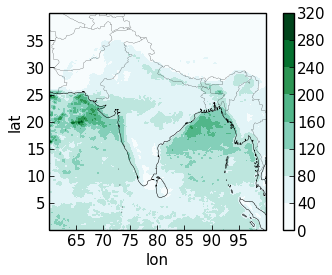

In [304]:
# India T2m 95th
# plt.figure(figsize=(8,8))
plot_3d2(precip_median, ind, cmap='BuGn', levels=11)
# plt.savefig('./images/postmon/full95/india_t2m95.pdf', dpi=300)

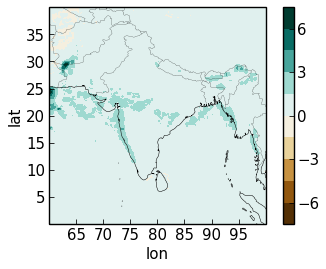

In [311]:
# India T2m 95th
# plt.figure(figsize=(8,8))
plot_3d2(-vimd_median, ind, cmap=tmap, levels=11)
# plt.savefig('./images/postmon/full95/india_t2m95.pdf', dpi=300)

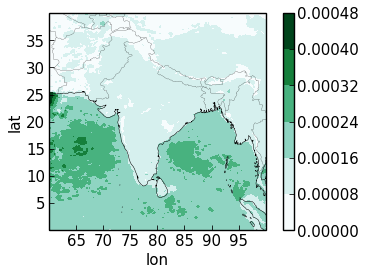

In [298]:
# India T2m 95th
# plt.figure(figsize=(8,8))
plot_3d2(-evap_median, ind, cmap='BuGn')
# plt.savefig('./images/postmon/full95/india_t2m95.pdf', dpi=300)